In [78]:
import numpy as np
import pandas as pd

In [79]:
df = pd.read_csv("Bachelor Thesis\data_train.csv")
target = "CLASS"

In [80]:
df.head(10)

,NAME,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,...,com.huawei.android.launcher.permission.CHANGE_BADGE,com.nbaimd.gametime.nba2011.permission.UA_DATA,com.android.browser.permission.WRITE_HISTORY_BOOKMARKS,com.cisco.anyconnect.vpn.android.permission.INTERNAL_VPN_STATE,com.huawei.launcher3.permission.WRITE_SETTINGS,android.permission.PREVENT_POWER_KEY,com.cloudmagic.mail.permission.C2D_MESSAGE,com.magazinecloner.anpt.permission.C2D_MESSAGE,android.permission.READ_MMS,CLASS
0,Signal-Android-website-prod-universal-release-...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,a.envisionmobile.caa.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,air.G2JValentineRoseEscape2017.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,air.com.playtika.slotomania.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ak.alizandro.smartaudiobookplayer.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,au.com.tapstyle.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,baby.com.DisneyCarToys.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,baby.com.KidsandToys.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,baby.com.ToysToSee.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,baby.com.kidsToysReview.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df.shape

(1168, 950)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 950 entries, NAME to CLASS
dtypes: int64(949), object(1)
memory usage: 8.5+ MB


In [83]:
df[target].unique()

array([0, 1], dtype=int64)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 950 entries, NAME to CLASS
dtypes: int64(949), object(1)
memory usage: 8.5+ MB


In [85]:
df[target].value_counts()

CLASS
1    602
0    566
Name: count, dtype: int64

In [86]:
X = df.loc[ : , df.columns != target] # features
X = X.loc[: , X.columns!="NAME"]
y = df[target]

In [87]:
X.columns

Index(['android.permission.ACCESS_ALL_DOWNLOADS',
       'android.permission.ACCESS_BLUETOOTH_SHARE',
       'android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_CHECKIN_PROPERTIES',
       'android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY',
       'android.permission.ACCESS_DOWNLOAD_MANAGER',
       'android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED',
       'android.permission.ACCESS_DRM_CERTIFICATES',
       'android.permission.ACCESS_EPHEMERAL_APPS',
       'android.permission.ACCESS_FM_RADIO',
       ...
       'android.permission.READ_OWNER_DATA',
       'com.huawei.android.launcher.permission.CHANGE_BADGE',
       'com.nbaimd.gametime.nba2011.permission.UA_DATA',
       'com.android.browser.permission.WRITE_HISTORY_BOOKMARKS',
       'com.cisco.anyconnect.vpn.android.permission.INTERNAL_VPN_STATE',
       'com.huawei.launcher3.permission.WRITE_SETTINGS',
       'android.permission.PREVENT_POWER_KEY',
       'com.cloudmagic.mail.permission.C2D_M

# Feature selection

## Anova

In [88]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd


def anova(X,y,num_of_feat):
  fs = SelectKBest(score_func=f_classif, k=5)
  fit = fs.fit(X,y)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)

  featureScores = pd.concat([dfcolumns,dfscores],axis=1)

  featureScores.columns = ['Best_columns','Score_ANOVA']

  lyst = featureScores.nlargest(num_of_feat,'Score_ANOVA')
  ANOVA_feature=list(lyst['Best_columns'])
  return ANOVA_feature

## Pearson

In [89]:
"""from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


def pearson(X,y,num_of_feat):
  fs = SelectKBest(score_func=f_regression, k=5)
  fit = fs.fit(X,y)

  #create df for scores
  dfscores = pd.DataFrame(fit.scores_)
  #create df for column names
  dfcolumns = pd.DataFrame(df.columns)
  #concat two dataframes for better visualization
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  #naming the dataframe columns
  featureScores.columns = ['Best_columns','Score_pearsons']

  #print 10 best features
  lyst = featureScores.nlargest(num_of_feat,'Score_pearsons')

  PEARSON_feature=list(lyst['Best_columns'])
  return PEARSON_feature"""

"from sklearn.datasets import make_regression\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import f_regression\n\n\ndef pearson(X,y,num_of_feat):\n  fs = SelectKBest(score_func=f_regression, k=5)\n  fit = fs.fit(X,y)\n\n  #create df for scores\n  dfscores = pd.DataFrame(fit.scores_)\n  #create df for column names\n  dfcolumns = pd.DataFrame(df.columns)\n  #concat two dataframes for better visualization\n  featureScores = pd.concat([dfcolumns,dfscores],axis=1)\n  #naming the dataframe columns\n  featureScores.columns = ['Best_columns','Score_pearsons']\n\n  #print 10 best features\n  lyst = featureScores.nlargest(num_of_feat,'Score_pearsons')\n\n  PEARSON_feature=list(lyst['Best_columns'])\n  return PEARSON_feature"

## Univarient feature selection

In [90]:
"""from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def u_f(X,y,num_of_feat):
  bestfeatures = SelectKBest(score_func=chi2, k=10)
  fit = bestfeatures.fit(X,y)

  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)


  #concat two dataframes for better visualization
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe columns



  sorted_df = featureScores.sort_values(by=['Score'], ascending=False)
  Univarient_feature = sorted_df["Specs"][:num_of_feat]
  return Univarient_feature"""

'from sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import chi2\n\ndef u_f(X,y,num_of_feat):\n  bestfeatures = SelectKBest(score_func=chi2, k=10)\n  fit = bestfeatures.fit(X,y)\n\n  dfscores = pd.DataFrame(fit.scores_)\n  dfcolumns = pd.DataFrame(X.columns)\n\n\n  #concat two dataframes for better visualization\n  featureScores = pd.concat([dfcolumns,dfscores],axis=1)\n  featureScores.columns = [\'Specs\',\'Score\']  #naming the dataframe columns\n\n\n\n  sorted_df = featureScores.sort_values(by=[\'Score\'], ascending=False)\n  Univarient_feature = sorted_df["Specs"][:num_of_feat]\n  return Univarient_feature'

## Function Call

In [91]:
anova_list = anova(X,y,len(X.columns))
anova_list

c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  2   4   7   8   9  10  11  14  15  17  19  20  21  22  25  26  27  28
  29  30  31  33  37  38  39  40  41  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  75  76  77  78  79  80  82  86  88  89  90  92  93  95  96
  97 100 106 108 109 110 112 113 115 116 117 118 119 123 125 126 127 129
 130 132 133 135 137 138 139 140 141 142 143 144 146 147 150 151 152 154
 156 157 159 164 166 167 169 170 172 173 174 175 176 178 179 180 181 182
 183 184 185 186 187 189 190 192 193 194 195 199 200 201 203 204 205 206
 207 209 210 211 212 213 215 216 217 218 219 220 222 225 226 227 230 235
 238 240 241 242 243 244 245 246 247 248 249 250 251 252 256 257 259 260
 261 262 263 265 266 267 268 269 272 273 275 277 278 279 284 285 286 287
 288 290 292 295 297 298 299 301 302 303 305 307 308 309 314 315 31

['android.permission.SEND_SMS',
 'android.permission.RECEIVE_SMS',
 'android.permission.READ_SMS',
 'android.permission.RECEIVE_BOOT_COMPLETED',
 'android.permission.READ_PHONE_STATE',
 'android.permission.SYSTEM_ALERT_WINDOW',
 'android.permission.WRITE_SMS',
 'android.permission.CHANGE_NETWORK_STATE',
 'android.permission.GET_TASKS',
 'android.permission.READ_CONTACTS',
 'android.permission.FOREGROUND_SERVICE',
 'android.permission.CHANGE_WIFI_STATE',
 'android.permission.CALL_PHONE',
 'android.permission.DISABLE_KEYGUARD',
 'android.permission.WRITE_SETTINGS',
 'android.permission.WAKE_LOCK',
 'android.permission.REQUEST_IGNORE_BATTERY_OPTIMIZATIONS',
 'android.permission.REQUEST_DELETE_PACKAGES',
 'com.android.vending.BILLING',
 'android.permission.INSTALL_PACKAGES',
 'android.permission.MOUNT_UNMOUNT_FILESYSTEMS',
 'android.permission.ACTION_MANAGE_OVERLAY_PERMISSION',
 'com.google.android.c2dm.permission.RECEIVE',
 'android.permission.ACCESS_WIFI_STATE',
 'com.google.android.fins

In [92]:
"""pearson_list = pearson(X,y,30)
pearson_list"""

'pearson_list = pearson(X,y,30)\npearson_list'

In [93]:
"""u_f_list = u_f(X,y,30)
u_f_list"""

'u_f_list = u_f(X,y,30)\nu_f_list'

In [94]:
X = df.loc[:,anova_list]
y = df[target]

In [95]:
X

,android.permission.SEND_SMS,android.permission.RECEIVE_SMS,android.permission.READ_SMS,android.permission.RECEIVE_BOOT_COMPLETED,android.permission.READ_PHONE_STATE,android.permission.SYSTEM_ALERT_WINDOW,android.permission.WRITE_SMS,android.permission.CHANGE_NETWORK_STATE,android.permission.GET_TASKS,android.permission.READ_CONTACTS,...,android.permission.TRUST_LISTENER,android.permission.TV_INPUT_HARDWARE,android.permission.TV_VIRTUAL_REMOTE_CONTROLLER,android.permission.UPDATE_CONFIG,android.permission.UPDATE_LOCK,android.permission.UPDATE_LOCK_TASK_PACKAGES,android.permission.USER_ACTIVITY,android.permission.WRITE_BLOCKED_NUMBERS,android.permission.WRITE_DREAM_STATE,android.permission.WRITE_GSERVICES
0,1,1,1,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1164,1,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1165,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1166,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [97]:
y_train.value_counts()

CLASS
1    476
0    458
Name: count, dtype: int64

In [98]:
"""from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)"""

'from imblearn.over_sampling import SMOTE\n\nsmote = SMOTE()\n\nX_train, y_train = smote.fit_resample(X_train, y_train)'

In [99]:
"""y_train.value_counts()"""

'y_train.value_counts()'

In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 948 entries, android.permission.SEND_SMS to android.permission.WRITE_GSERVICES
dtypes: int64(948)
memory usage: 8.4 MB


In [101]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       108
           1       0.94      0.91      0.93       126

    accuracy                           0.92       234
   macro avg       0.92      0.92      0.92       234
weighted avg       0.92      0.92      0.92       234

[[101   7]
 [ 11 115]]
0.9230769230769231


In [103]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [104]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = gbc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       108
           1       0.97      0.87      0.92       126

    accuracy                           0.91       234
   macro avg       0.92      0.92      0.91       234
weighted avg       0.92      0.91      0.91       234

[[105   3]
 [ 17 109]]
0.9145299145299145


In [105]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, max_depth=10)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=10)

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = gbc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       108
           1       0.92      0.89      0.90       126

    accuracy                           0.90       234
   macro avg       0.90      0.90      0.90       234
weighted avg       0.90      0.90      0.90       234

[[ 98  10]
 [ 14 112]]
0.8974358974358975


# Grid Search CV

In [107]:
"""from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_classifier = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)"""

'from sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.model_selection import GridSearchCV\n\ngb_classifier = GradientBoostingClassifier()\n\nparam_grid = {\n    \'n_estimators\': [50, 100, 150],\n    \'learning_rate\': [0.01, 0.1, 0.5],\n    \'max_depth\': [3, 4, 5]\n}\n\ngrid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring=\'accuracy\')\n\ngrid_search.fit(X_train, y_train)\n\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint("Best Parameters:", best_params)\nprint("Best Score:", best_score)\n\ntest_accuracy = grid_search.best_estimator_.score(X_test, y_test)\nprint("Test Accuracy:", test_accuracy)'

In [108]:
"""results_df = pd.DataFrame(grid_search.cv_results_)
results_df[['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']]"""

"results_df = pd.DataFrame(grid_search.cv_results_)\nresults_df[['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']]"

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100,max_depth=4, learning_rate=0.5)

gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=4)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = gb_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       108
           1       0.93      0.90      0.92       126

    accuracy                           0.91       234
   macro avg       0.91      0.91      0.91       234
weighted avg       0.91      0.91      0.91       234

[[ 99   9]
 [ 12 114]]
0.9102564102564102


In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = gb_classifier.predict(X_train)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       458
           1       1.00      0.98      0.99       476

    accuracy                           0.99       934
   macro avg       0.99      0.99      0.99       934
weighted avg       0.99      0.99      0.99       934

[[457   1]
 [  8 468]]
0.9903640256959315


# > **BruteForce Tuning for Gradient Boosting**

## Default Param

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100,max_depth=4, learning_rate=0.5)

gbc.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = gbc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       108
           1       0.92      0.89      0.90       126

    accuracy                           0.90       234
   macro avg       0.90      0.90      0.90       234
weighted avg       0.90      0.90      0.90       234

[[ 98  10]
 [ 14 112]]
0.8974358974358975


## Tuning n_estimators

1/250 round completed......................... Test Accuracy: 0.8247863247863247  >>>>>>> Train Accuracy: 0.8222698072805139
6/250 round completed......................... Test Accuracy: 0.8589743589743589  >>>>>>> Train Accuracy: 0.8640256959314775
11/250 round completed......................... Test Accuracy: 0.8717948717948718  >>>>>>> Train Accuracy: 0.8790149892933619
16/250 round completed......................... Test Accuracy: 0.8760683760683761  >>>>>>> Train Accuracy: 0.8843683083511777
21/250 round completed......................... Test Accuracy: 0.8846153846153846  >>>>>>> Train Accuracy: 0.892933618843683
26/250 round completed......................... Test Accuracy: 0.8846153846153846  >>>>>>> Train Accuracy: 0.8950749464668094
31/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.8993576017130621
36/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.901498929336

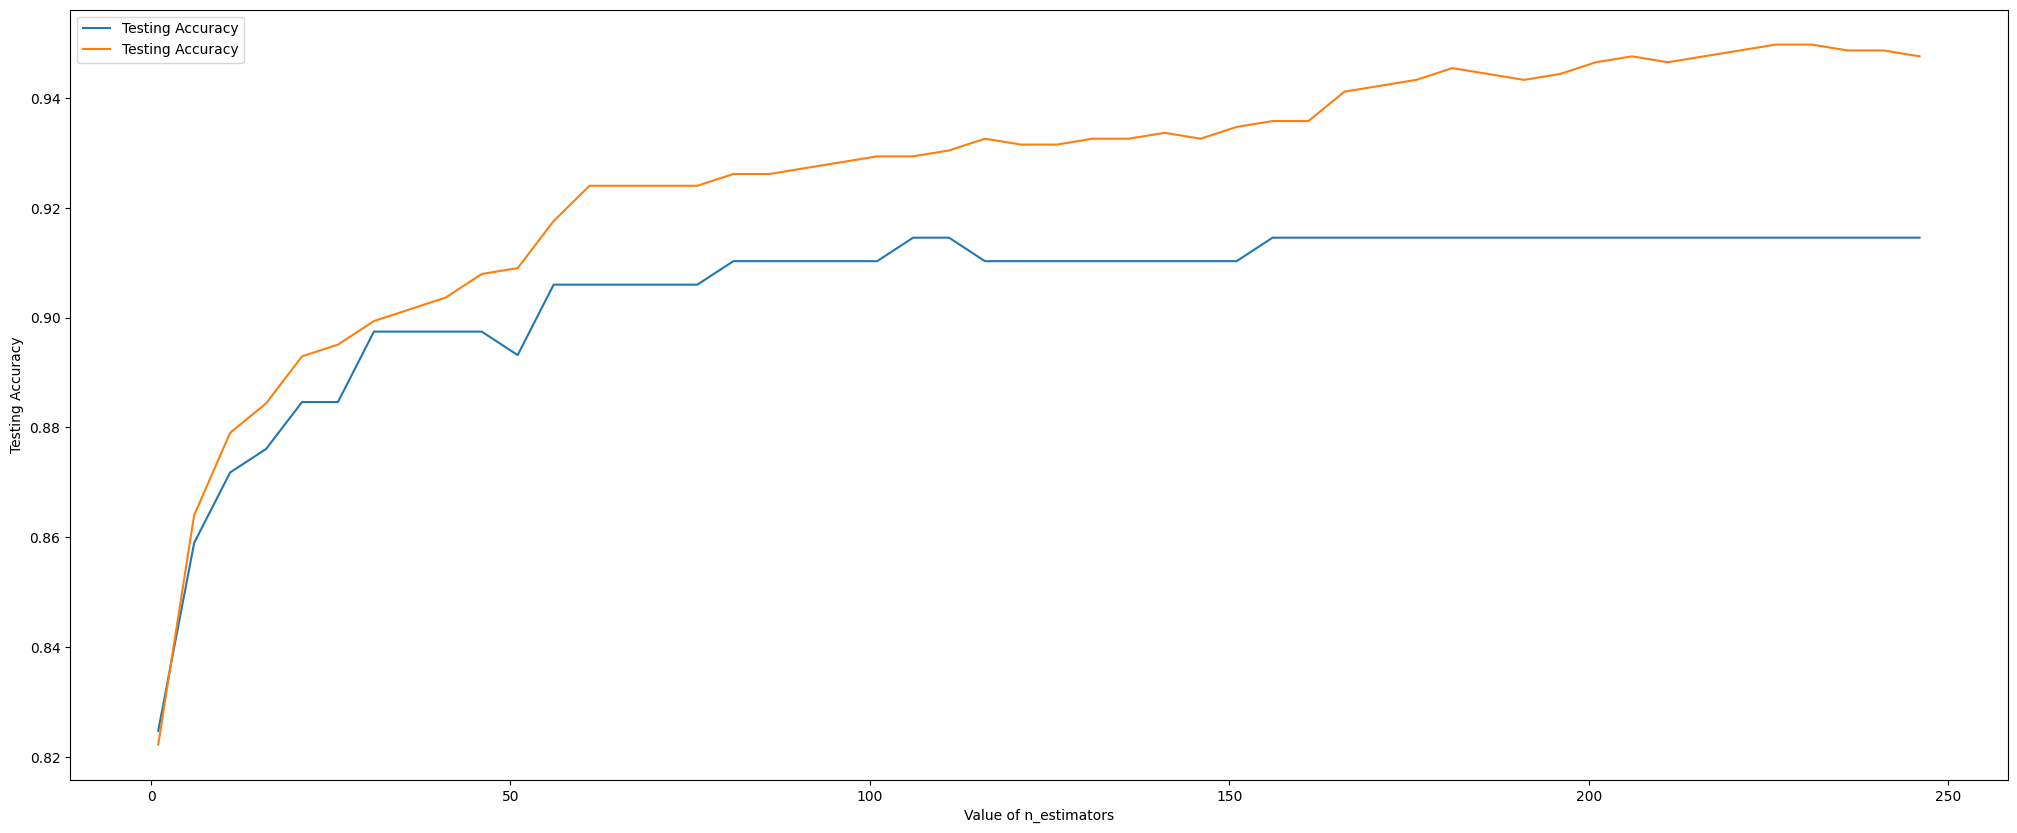

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
# from tqdm.notebook import tqdm

N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
#for k in tqdm(k_range):
for k in (k_range):
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

## Tuning max_depth

1/50 round completed......................... Test Accuracy: 0.8760683760683761  >>>>>>> Train Accuracy: 0.8843683083511777
6/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.974304068522484
11/50 round completed......................... Test Accuracy: 0.9273504273504274  >>>>>>> Train Accuracy: 0.9935760171306209
16/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9935760171306209
21/50 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9935760171306209
26/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9935760171306209
31/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9935760171306209
36/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9935760171306209
41/

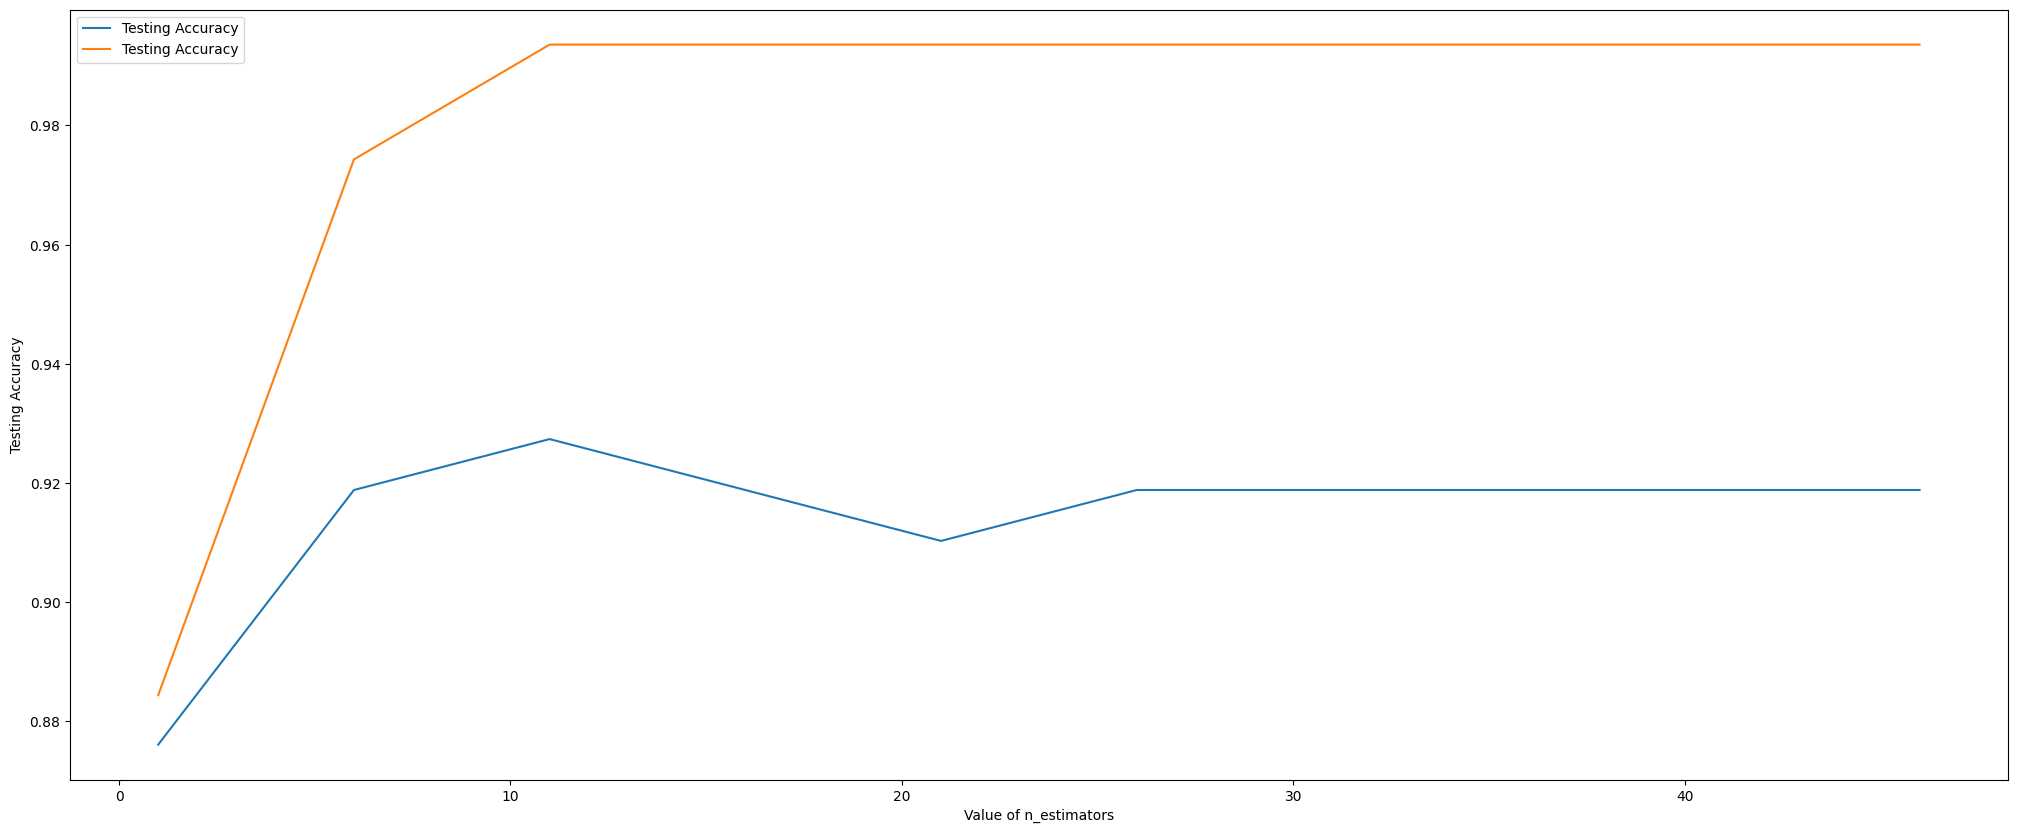

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [115]:
rf_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9273504273504274


In [116]:
rf_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9935760171306209


In [117]:
rf_all = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9145299145299145


In [118]:
rf_all = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9293361884368309


# > **BruteForce Tuning for Randomforest**

## Default Param

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier()
rf_default.fit(X_train, y_train)
y_pred_test=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print("Accurecy: ",accuracy_score(y_test,y_pred_test))

[[100   8]
 [ 13 113]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       108
           1       0.93      0.90      0.91       126

    accuracy                           0.91       234
   macro avg       0.91      0.91      0.91       234
weighted avg       0.91      0.91      0.91       234

Accurecy:  0.9102564102564102


## Tuning n_estimators

1/250 round completed......................... Test Accuracy: 0.8632478632478633  >>>>>>> Train Accuracy: 0.9464668094218416
6/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9796573875802997


11/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9903640256959315
16/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9903640256959315
21/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9925053533190579
26/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9935760171306209
31/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9935760171306209
36/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9935760171306209
41/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9935760171306209
46/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.99357601713

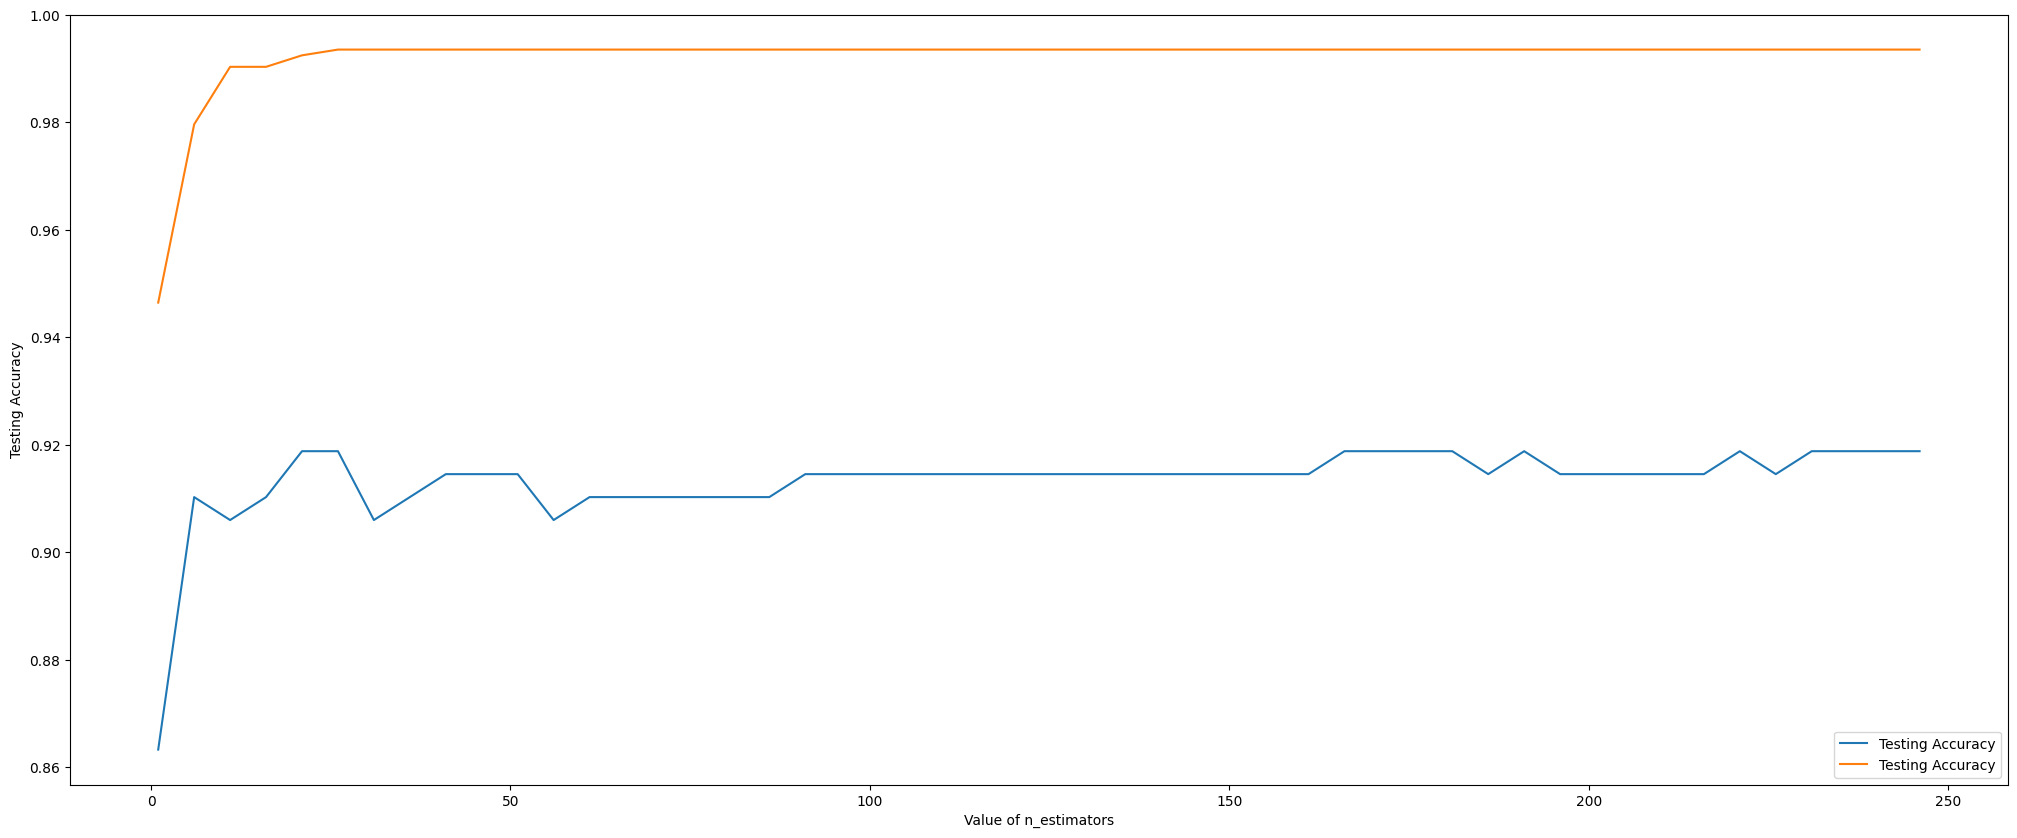

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from tqdm.notebook import tqdm

N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
#for k in tqdm(k_range):
for k in (k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

## Tuning max_depth

1/50 round completed......................... Test Accuracy: 0.7905982905982906  >>>>>>> Train Accuracy: 0.80406852248394
6/50 round completed......................... Test Accuracy: 0.8504273504273504  >>>>>>> Train Accuracy: 0.8736616702355461
11/50 round completed......................... Test Accuracy: 0.8717948717948718  >>>>>>> Train Accuracy: 0.9132762312633833
16/50 round completed......................... Test Accuracy: 0.8931623931623932  >>>>>>> Train Accuracy: 0.9475374732334048
21/50 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9646680942184154
26/50 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9775160599571735
31/50 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.9935760171306209
36/50 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9935760171306209
41/5

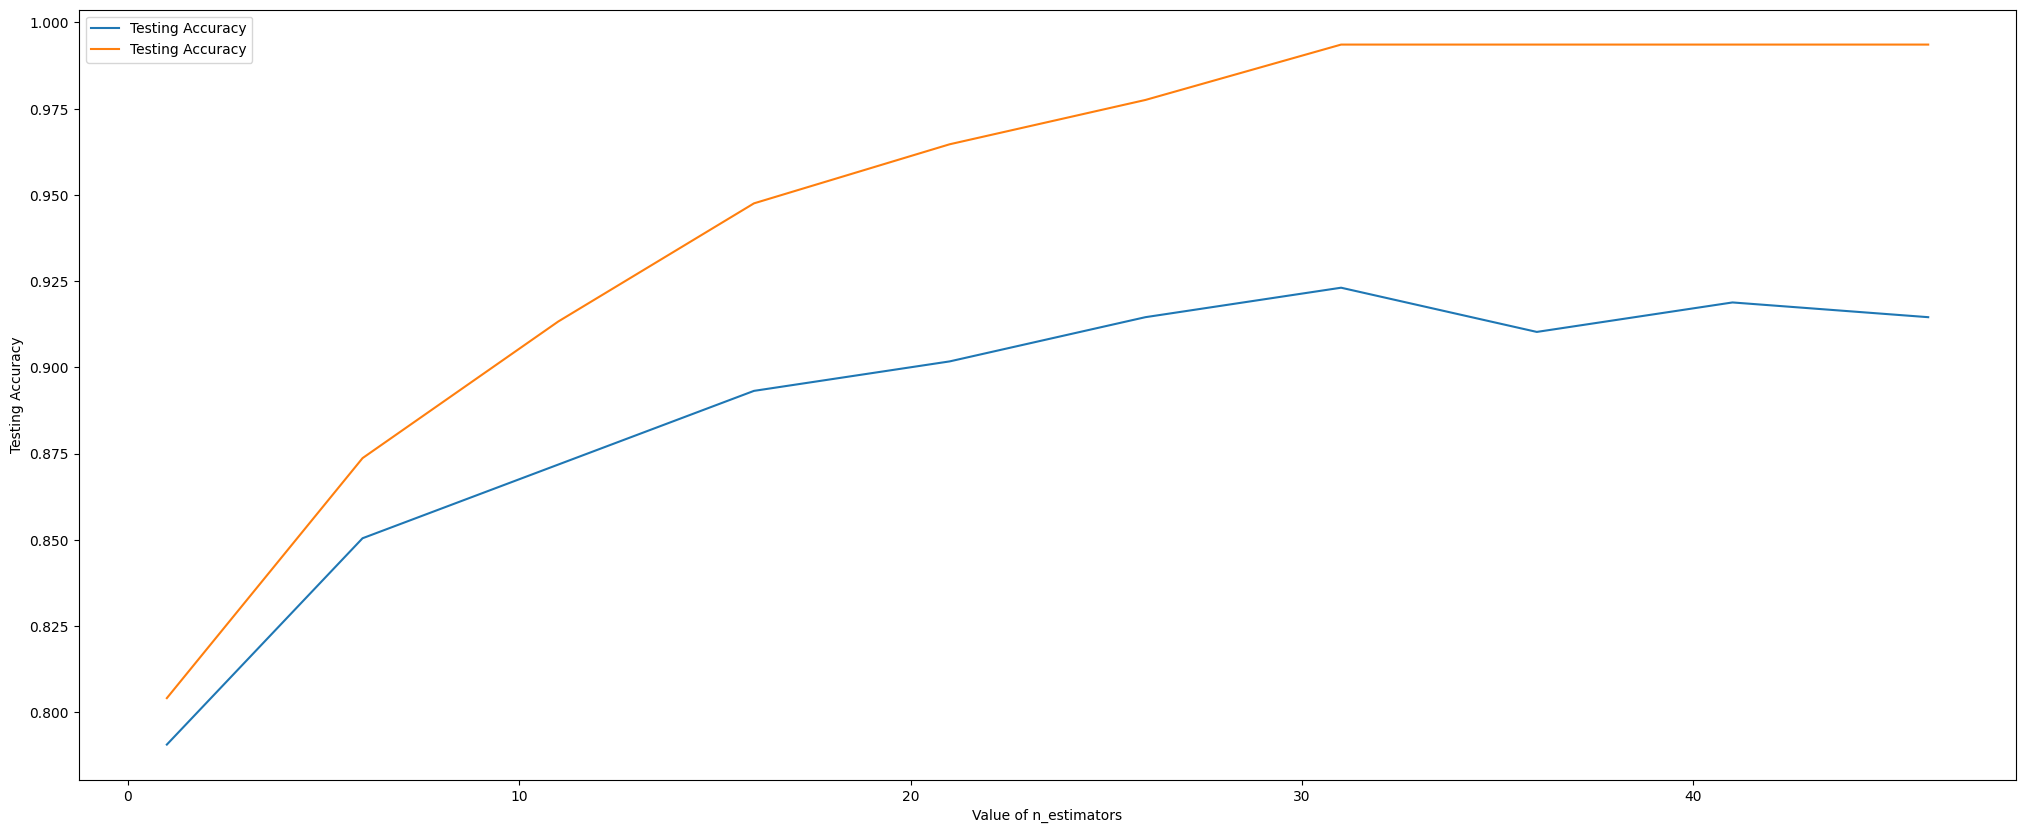

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [122]:
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9273504273504274


In [123]:
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9925053533190579


# > **BruteForce Tuning for AdaBoosting**

## Default Param

In [124]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)

ada_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = ada_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.95      0.88       108
           1       0.95      0.83      0.89       126

    accuracy                           0.88       234
   macro avg       0.89      0.89      0.88       234
weighted avg       0.89      0.88      0.88       234

[[103   5]
 [ 22 104]]
0.8846153846153846


## Tuning n_estimators

1/250 round completed......................... Test Accuracy: 0.6794871794871795  >>>>>>> Train Accuracy: 0.7130620985010707


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


6/250 round completed......................... Test Accuracy: 0.8376068376068376  >>>>>>> Train Accuracy: 0.8340471092077087
11/250 round completed......................... Test Accuracy: 0.8504273504273504  >>>>>>> Train Accuracy: 0.854389721627409


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


16/250 round completed......................... Test Accuracy: 0.8931623931623932  >>>>>>> Train Accuracy: 0.8768736616702355


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


21/250 round completed......................... Test Accuracy: 0.8803418803418803  >>>>>>> Train Accuracy: 0.8811563169164882


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


26/250 round completed......................... Test Accuracy: 0.8931623931623932  >>>>>>> Train Accuracy: 0.8907922912205567


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


31/250 round completed......................... Test Accuracy: 0.8888888888888888  >>>>>>> Train Accuracy: 0.8907922912205567


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


36/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.8993576017130621


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


41/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.9025695931477516


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


46/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.9047109207708779


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


51/250 round completed......................... Test Accuracy: 0.8846153846153846  >>>>>>> Train Accuracy: 0.9025695931477516


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


56/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.9154175588865097


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


61/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.9207708779443254


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


66/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9207708779443254


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


71/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9218415417558886


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


76/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.9229122055674518


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


81/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9282655246252677


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


86/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9271948608137045


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


91/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9293361884368309


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


96/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9293361884368309


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


101/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.930406852248394


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


106/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9314775160599572


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


111/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9325481798715204


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


116/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.930406852248394


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


121/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9325481798715204


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


126/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9346895074946466


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


131/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9357601713062098


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


136/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9389721627408993


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


141/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9400428265524625


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


146/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9421841541755889


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


151/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.943254817987152


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


156/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.943254817987152


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


161/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9443254817987152


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


166/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9421841541755889


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


171/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.943254817987152


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


176/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9443254817987152


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


181/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


186/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9464668094218416


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


191/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9464668094218416


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


196/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9443254817987152


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


201/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


206/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


211/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


216/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9464668094218416


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


221/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


226/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


231/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9475374732334048


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


236/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9464668094218416


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


241/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


246/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9464668094218416
The best n_estimators:
81


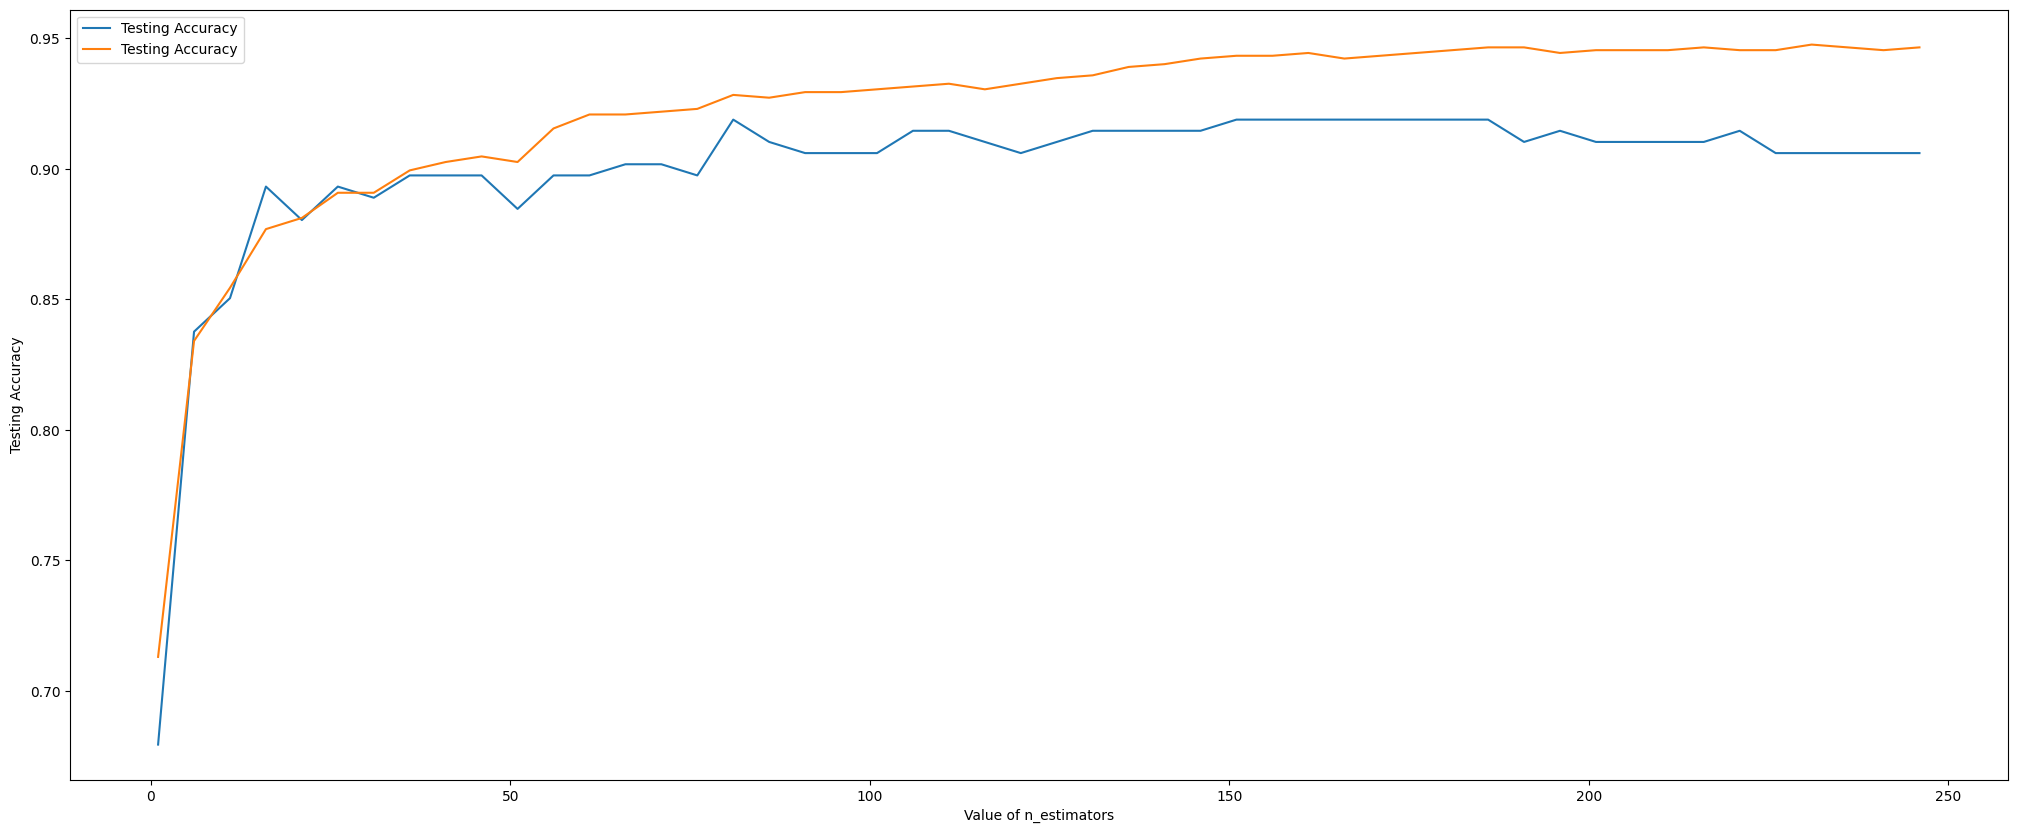

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
#from tqdm.notebook import tqdm

N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
#for k in tqdm(k_range):
for k in (k_range):
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [126]:
rf_all = AdaBoostClassifier(n_estimators=best_estimator, random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accurecy:  0.9188034188034188


In [127]:
rf_all = AdaBoostClassifier(n_estimators=best_estimator, random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accurecy:  0.9282655246252677


# > **BruteForce Tuning for HistGradientBoostingClassifier**

## Default parameter

In [128]:
from sklearn.ensemble import HistGradientBoostingClassifier

hb_classifier = HistGradientBoostingClassifier(max_iter=100, max_depth=4, learning_rate=0.5)

hb_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = hb_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       108
           1       0.97      0.90      0.93       126

    accuracy                           0.93       234
   macro avg       0.93      0.93      0.93       234
weighted avg       0.93      0.93      0.93       234

[[104   4]
 [ 13 113]]
0.9273504273504274


## Tuning max_iter

1/250 round completed......................... Test Accuracy: 0.8376068376068376  >>>>>>> Train Accuracy: 0.8490364025695931
6/250 round completed......................... Test Accuracy: 0.8504273504273504  >>>>>>> Train Accuracy: 0.8704496788008566
11/250 round completed......................... Test Accuracy: 0.8846153846153846  >>>>>>> Train Accuracy: 0.9068522483940042
16/250 round completed......................... Test Accuracy: 0.8760683760683761  >>>>>>> Train Accuracy: 0.9057815845824411
21/250 round completed......................... Test Accuracy: 0.8931623931623932  >>>>>>> Train Accuracy: 0.9218415417558886
26/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.9421841541755889
31/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9475374732334048
36/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.95396145610

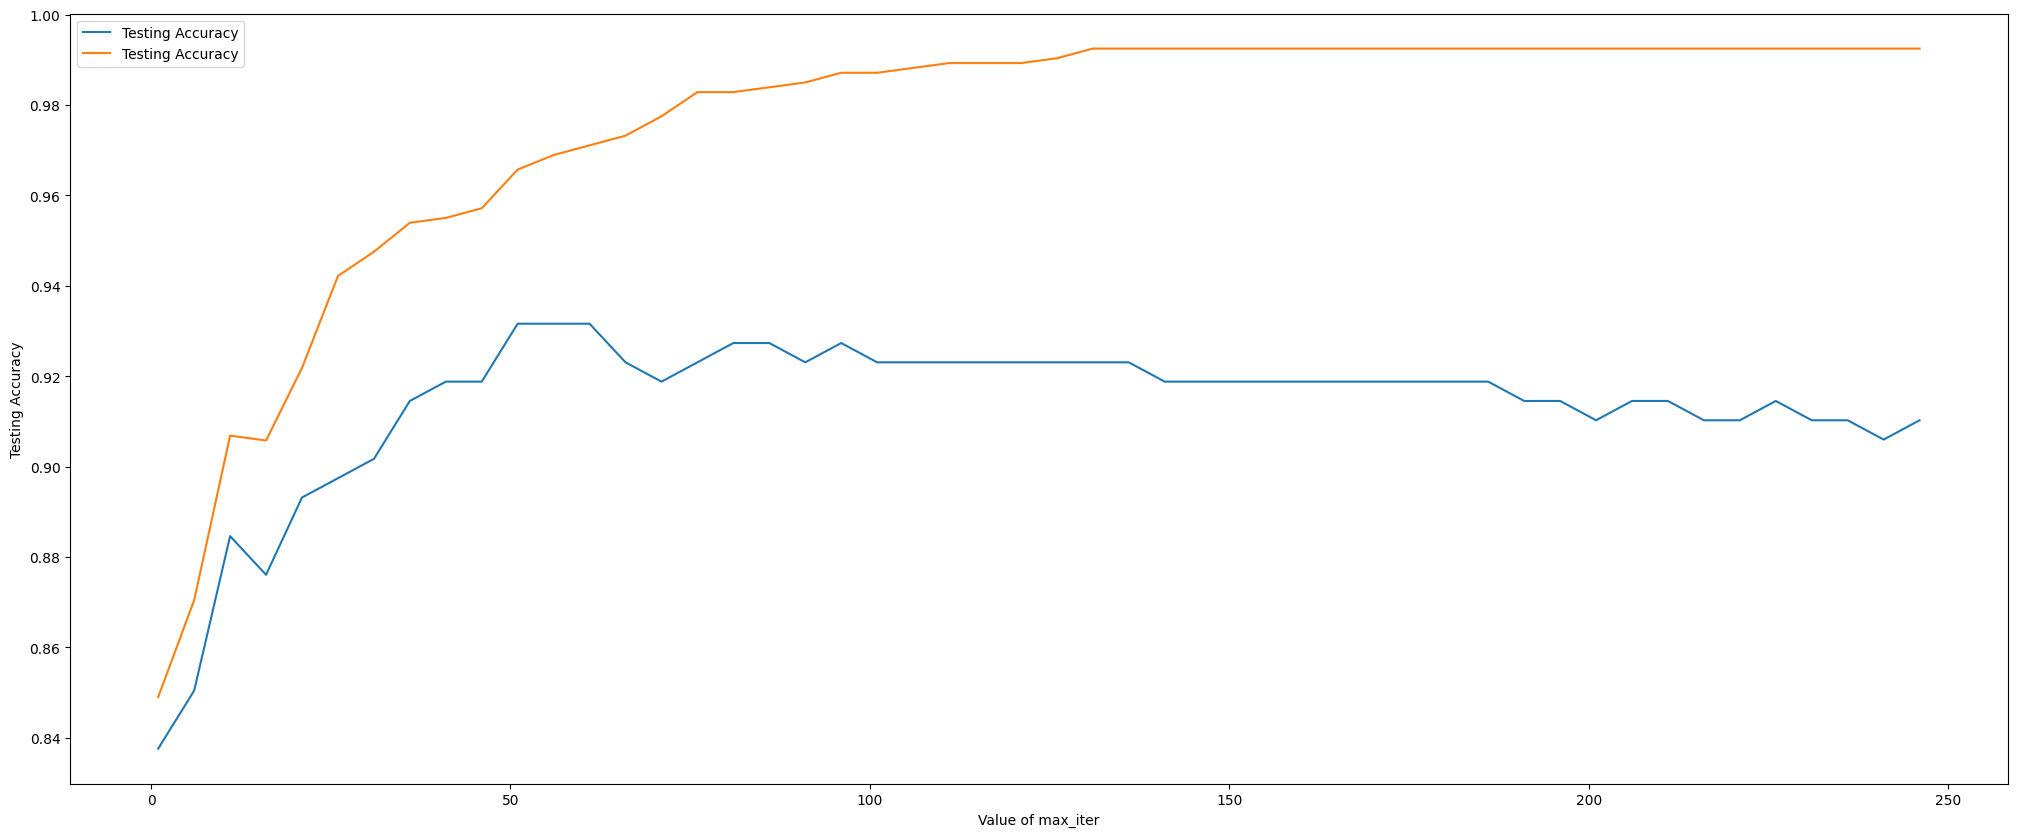

In [129]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
#from tqdm.notebook import tqdm

N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
#for k in tqdm(k_range):
for k in (k_range):
  classifier = HistGradientBoostingClassifier(max_iter=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of max_iter')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best max_iter:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

## Tuning max_depth

1/50 round completed......................... Test Accuracy: 0.8717948717948718  >>>>>>> Train Accuracy: 0.8758029978586723
6/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9507494646680942
11/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9785867237687366
16/50 round completed......................... Test Accuracy: 0.9273504273504274  >>>>>>> Train Accuracy: 0.9839400428265525
21/50 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.987152034261242
26/50 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.987152034261242
31/50 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.987152034261242
36/50 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.987152034261242
41/50 

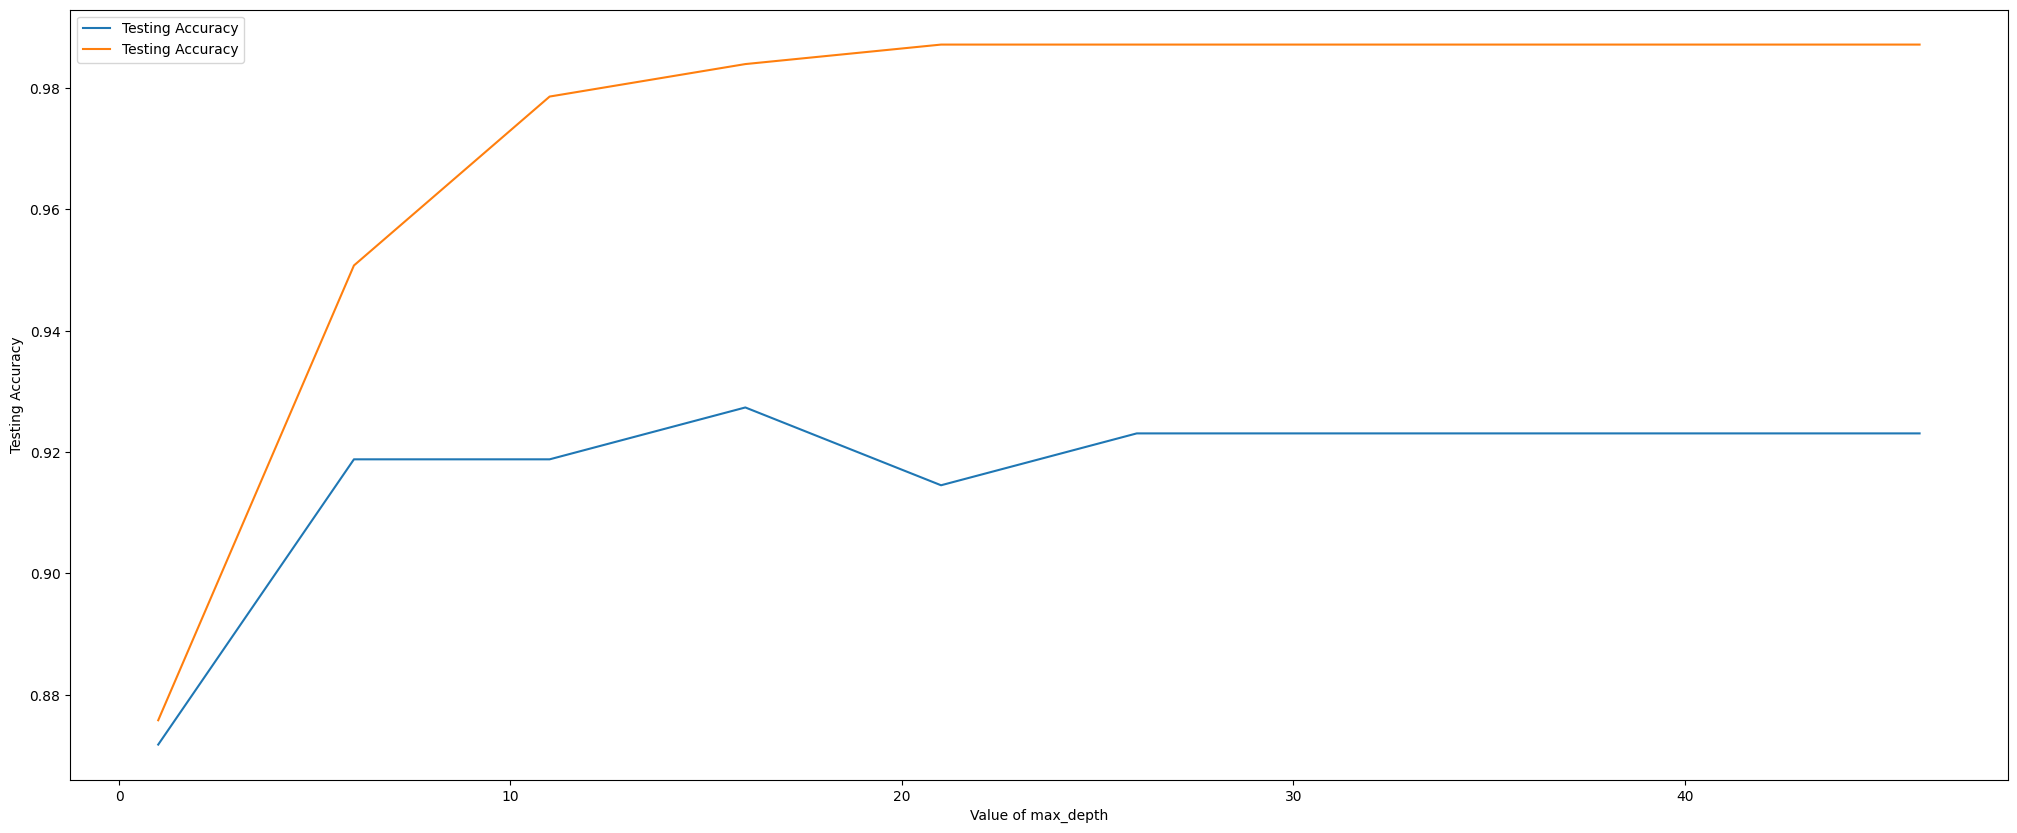

In [130]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = HistGradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of max_depth')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [131]:
rf_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9316239316239316


In [132]:
rf_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9646680942184154


# > **BruteForce Tuning for XGBoost**

## Default parameter

In [133]:
import xgboost as xgb
rf_default = xgb.XGBClassifier() # Create an instance of XGBoost classifier
rf_default.fit(X_train, y_train) # Train the classifier
y_pred_test = rf_default.predict(X_test) # Predict on the test data

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print confusion matrix, classification report, and accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nAccuracy:", accuracy_score(y_test, y_pred_test))

Confusion Matrix:
[[102   6]
 [ 12 114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       108
           1       0.95      0.90      0.93       126

    accuracy                           0.92       234
   macro avg       0.92      0.92      0.92       234
weighted avg       0.92      0.92      0.92       234


Accuracy: 0.9230769230769231


## Tuning n_estimators

1/250 round completed......................... Test Accuracy: 0.8717948717948718  >>>>>>> Train Accuracy: 0.8747323340471093
6/250 round completed......................... Test Accuracy: 0.8931623931623932  >>>>>>> Train Accuracy: 0.9132762312633833
11/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.936830835117773
16/250 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.9379014989293362
21/250 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.9475374732334048
26/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9539614561027837
31/250 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.9635974304068522
36/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.972162740899

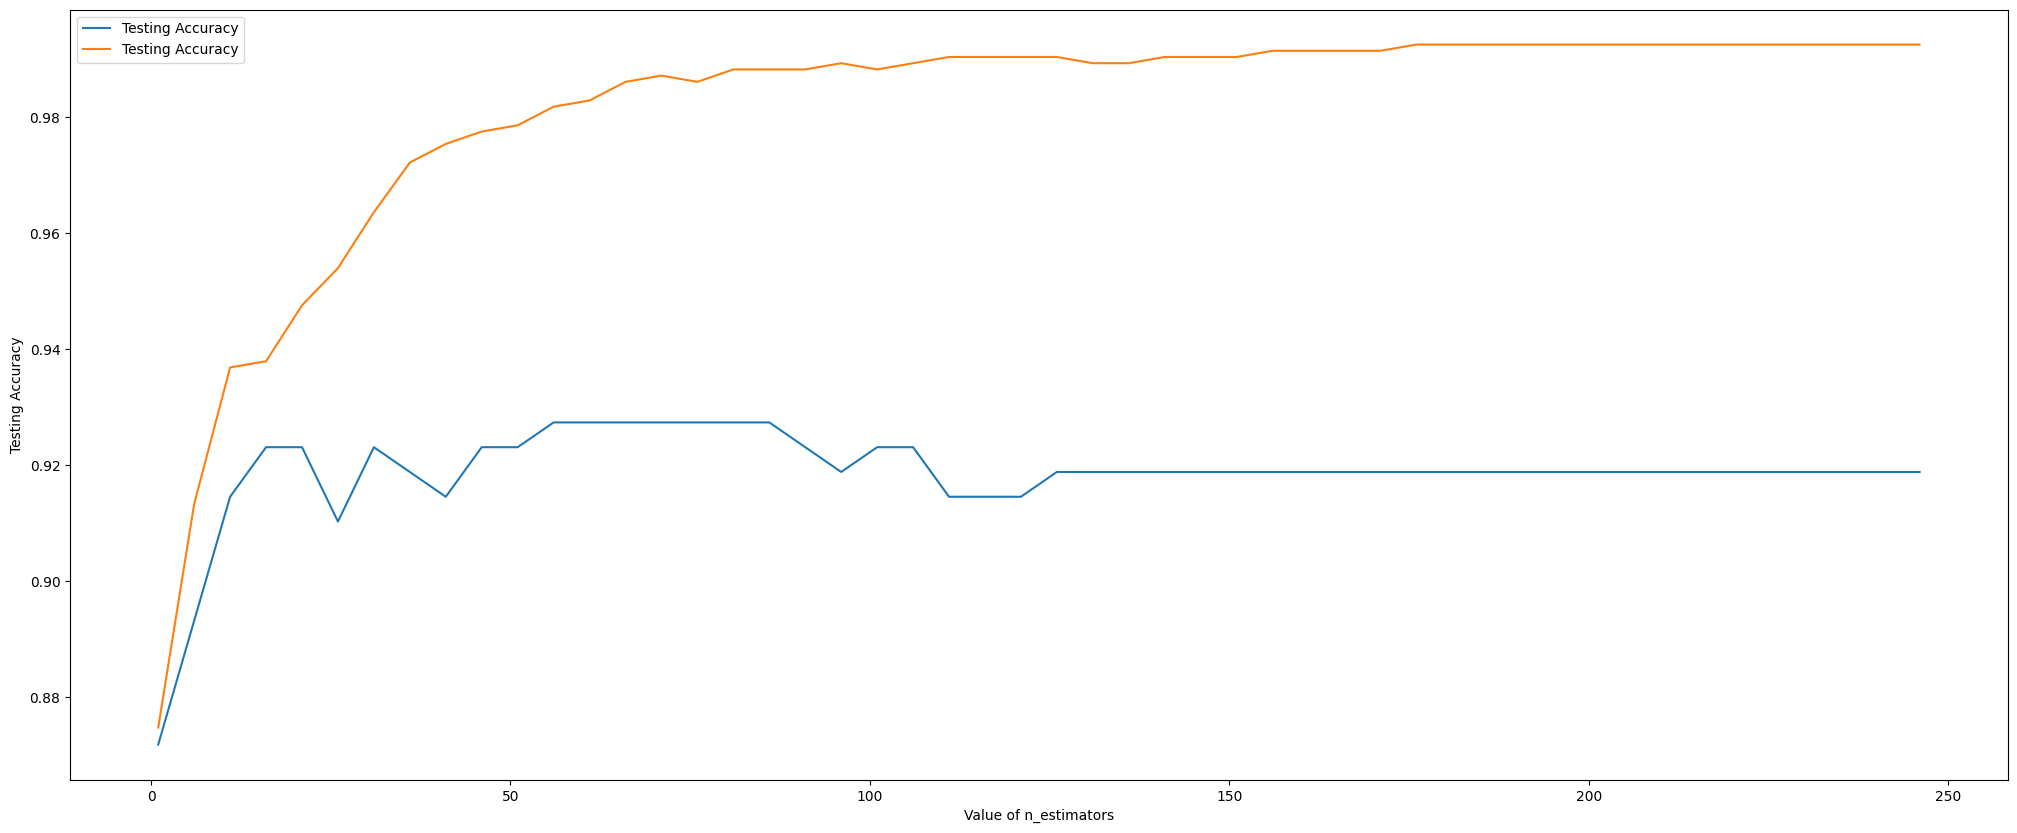

In [134]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/50 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.8897216274089935
6/50 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.9892933618843683
11/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9925053533190579
16/50 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9925053533190579
21/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9925053533190579
26/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9925053533190579
31/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9925053533190579
36/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9925053533190579
41

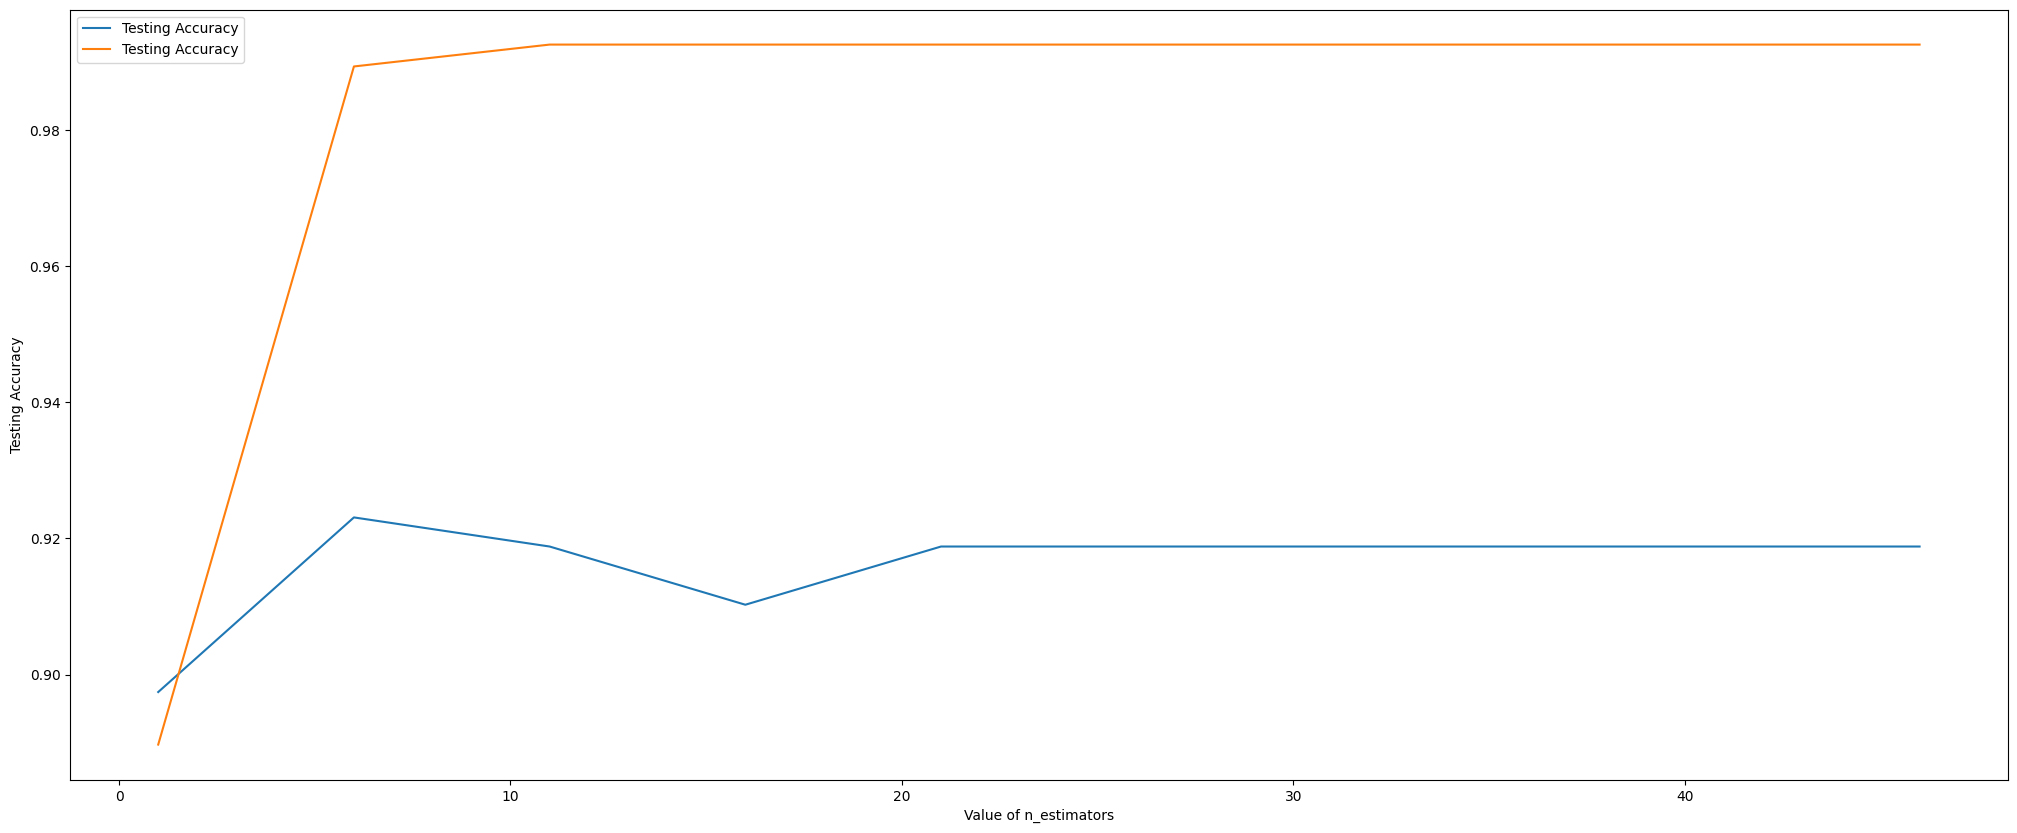

In [135]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [136]:
rf_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9273504273504274


In [137]:
rf_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9817987152034261


# SVM

In [138]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create an instance of SVC classifier
rf_default = SVC()

# Train the classifier
rf_default.fit(X_train, y_train)

# Predict on the test data
y_pred_test = rf_default.predict(X_test)

# Print confusion matrix, classification report, and accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nAccuracy:", accuracy_score(y_test, y_pred_test))

Confusion Matrix:
[[106   2]
 [ 19 107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       108
           1       0.98      0.85      0.91       126

    accuracy                           0.91       234
   macro avg       0.91      0.92      0.91       234
weighted avg       0.92      0.91      0.91       234


Accuracy: 0.9102564102564102
